In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Pattern Recognition/Dataset/hmnist_28_28_RGB.csv')

In [ ]:
y = data['label']
x = data.drop(columns = ['label'])

In [ ]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [ ]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


## Exploratory Data Analysis (EDA)

In [ ]:
tabular_data = pd.read_csv('/content/drive/MyDrive/Pattern Recognition/Dataset/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

Text(0.5, 1.0, 'Frequency Distribution of Classes')

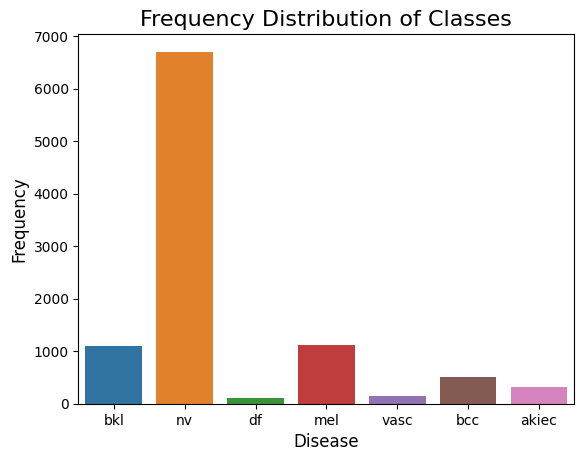

In [ ]:
"""Frequency Distribution of Classes"""

sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

## Oversampling

In [ ]:
t = np.zeros([46935, 32, 32, 3],dtype=np.float32)
print(t.shape)

(46935, 32, 32, 3)


In [ ]:
import scipy.ndimage

In [ ]:
for i in range(46935):
    t[i] = scipy.ndimage.zoom(x[i],32/28)

In [ ]:
x = np.array(t).reshape(-1,32,32,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 32, 32, 3)


In [ ]:
"""Standardization and Splitting Data"""

x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

## Model Training

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (32, 32, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Pattern Recognition/Oversampling/cnn_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    callbacks=[callback])

Epoch 1/50
235/235 [==============================] - ETA: 0s - loss: 1.2236 - accuracy: 0.5293
Epoch 1: saving model to /content/drive/MyDrive/Pattern Recognition/Oversampling/cnn_model.h5
235/235 [==============================] - 15s 16ms/step - loss: 1.2236 - accuracy: 0.5293 - val_loss: 0.8967 - val_accuracy: 0.6585
Epoch 2/50
228/235 [============================>.] - ETA: 0s - loss: 0.6708 - accuracy: 0.7561
Epoch 2: saving model to /content/drive/MyDrive/Pattern Recognition/Oversampling/cnn_model.h5
235/235 [==============================] - 2s 9ms/step - loss: 0.6665 - accuracy: 0.7578 - val_loss: 0.5525 - val_accuracy: 0.8025
Epoch 3/50
234/235 [============================>.] - ETA: 0s - loss: 0.4257 - accuracy: 0.8485
Epoch 3: saving model to /content/drive/MyDrive/Pattern Recognition/Oversampling/cnn_model.h5
235/235 [==============================] - 2s 9ms/step - loss: 0.4256 - accuracy: 0.8485 - val_loss: 0.3522 - val_accuracy: 0.8695
Epoch 4/50
233/235 [===============

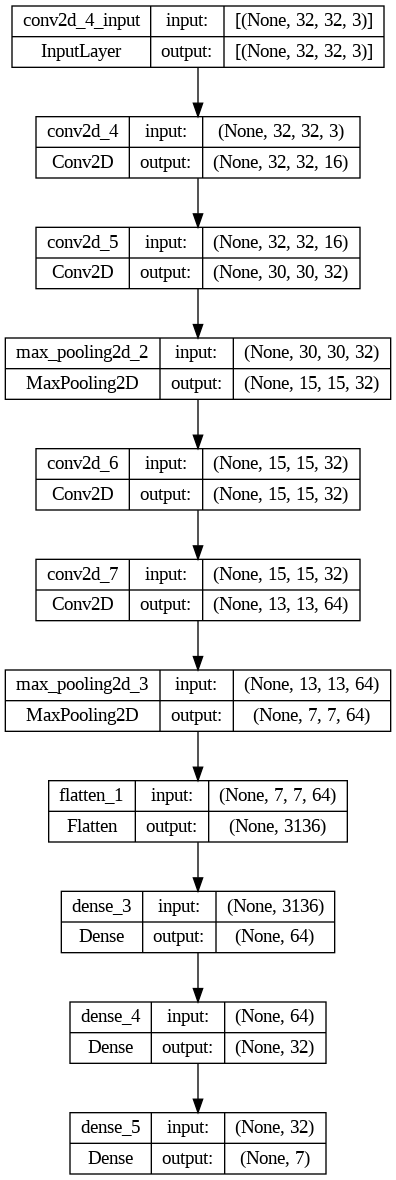

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/Pattern Recognition/model_plot.png', show_shapes=True, show_layer_names=True)

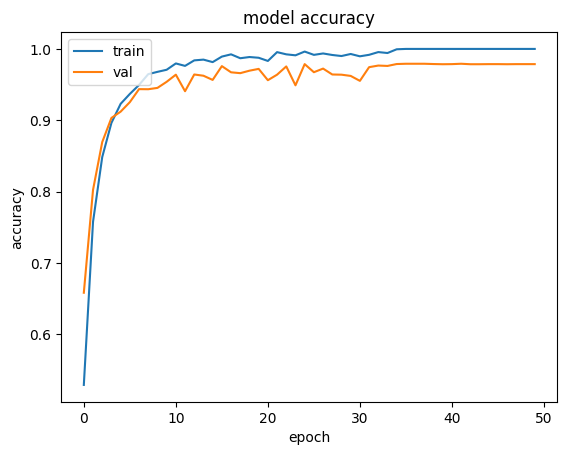

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

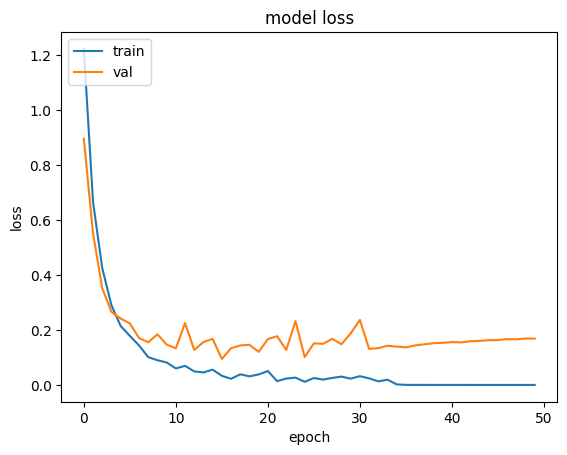

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('/content/drive/MyDrive/Pattern Recognition/Oversampling/cnn_model.h5')

In [ ]:
loss, acc = model.evaluate(X_train, Y_train, verbose=2)

1174/1174 - 3s - loss: 0.0337 - accuracy: 0.9957 - 3s/epoch - 3ms/step


In [ ]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 1s - loss: 0.1883 - accuracy: 0.9785 - 1s/epoch - 4ms/step
